# RATHOD JAY BHARATBHAI

## TASK : 2

# GRIP FEB'21

# Prediction using Unsupervised ML

Objective : predict the optimum number of clusters and represent it visually ?

# Kmeans Clustering

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data_df = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [7]:
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


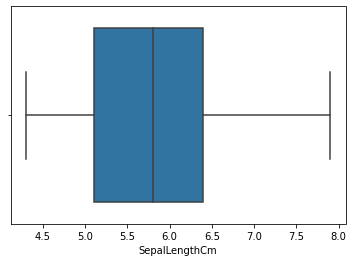

In [8]:
sns.boxplot(data.SepalLengthCm)

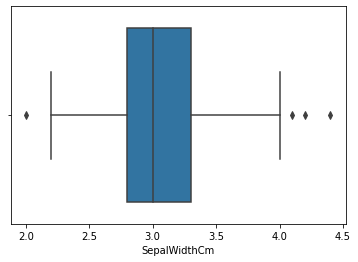

In [9]:
sns.boxplot(data.SepalWidthCm)

### We Have To Remove The Outlier

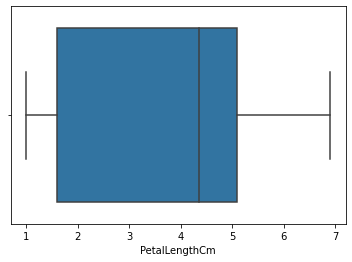

In [10]:
sns.boxplot(data.PetalLengthCm)

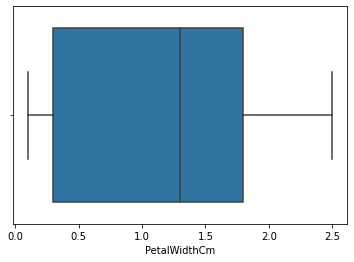

In [11]:
sns.boxplot(data.PetalWidthCm)

In [12]:
def outlier_treatment(data_column):
    sorted(data_column)
    Q1,Q3 = np.percentile(data_column,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [13]:
l,u = outlier_treatment(data.SepalWidthCm)

In [14]:
l,u

(2.05, 4.05)

In [15]:
data.drop(data[(data.SepalWidthCm > u) | (data.SepalWidthCm < l)].index,inplace=True)

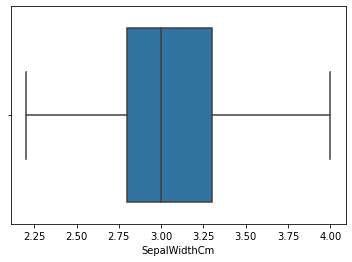

In [16]:
sns.boxplot(data.SepalWidthCm)

In [17]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.718722,-0.384320,0.880016,0.898193
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000


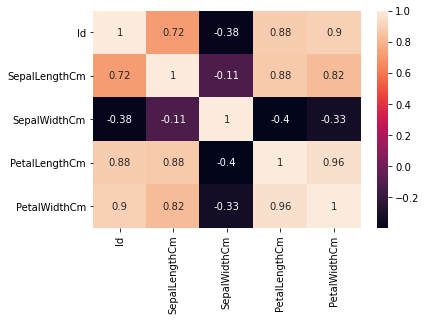

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
# sum of square
sum_of_sqaure = []
for num_cluster in list(range(1,7)):
    model_cluster = KMeans(n_clusters=num_cluster,max_iter=50,random_state=12)
    model_cluster.fit(data_df)
    sum_of_sqaure.append(model_cluster.inertia_)

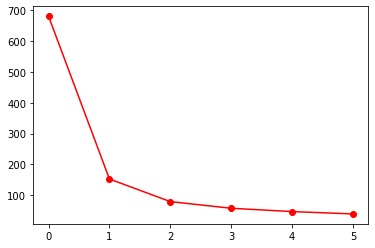

In [20]:
plt.plot(sum_of_sqaure,marker='o',color='r')

In [21]:
kmeans = KMeans(n_clusters=3)

In [22]:
kmeans.fit(data_df)

KMeans(n_clusters=3)

In [23]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [24]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
unique,count = np.unique(kmeans.labels_,return_counts=True)

In [26]:
unique,count

(array([0, 1, 2]), array([50, 62, 38], dtype=int64))

In [27]:
data_df['Cluster'] = kmeans.fit_predict(data_df)

In [28]:
y_kmeans =  kmeans.fit_predict(data_df)

In [29]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

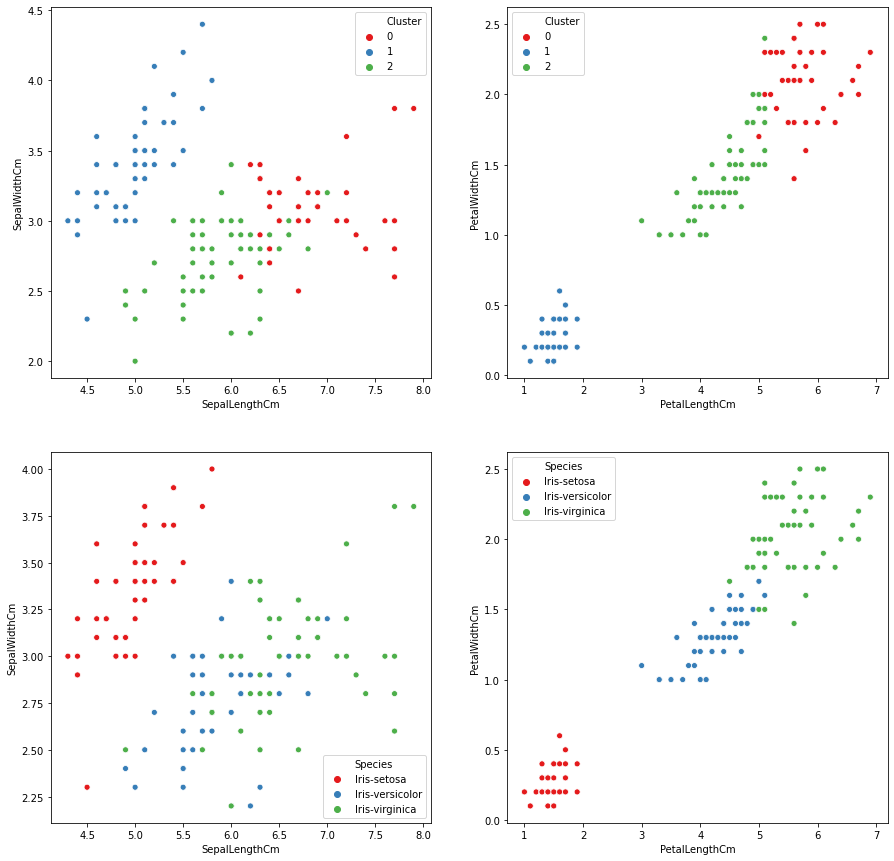

In [30]:
fig, axes = plt.subplots(2,2, figsize=(15,15))

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Cluster',legend='full',palette='Set1',data=data_df,ax=axes[0,0])
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Cluster',legend='full',palette='Set1',data=data_df,ax=axes[0,1])

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',legend='full',palette='Set1',data=data,ax=axes[1,0])
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',legend='full',palette='Set1',data=data,ax=axes[1,1])


## Predicted Data Define By Cluster And Actual Data Define By Species.

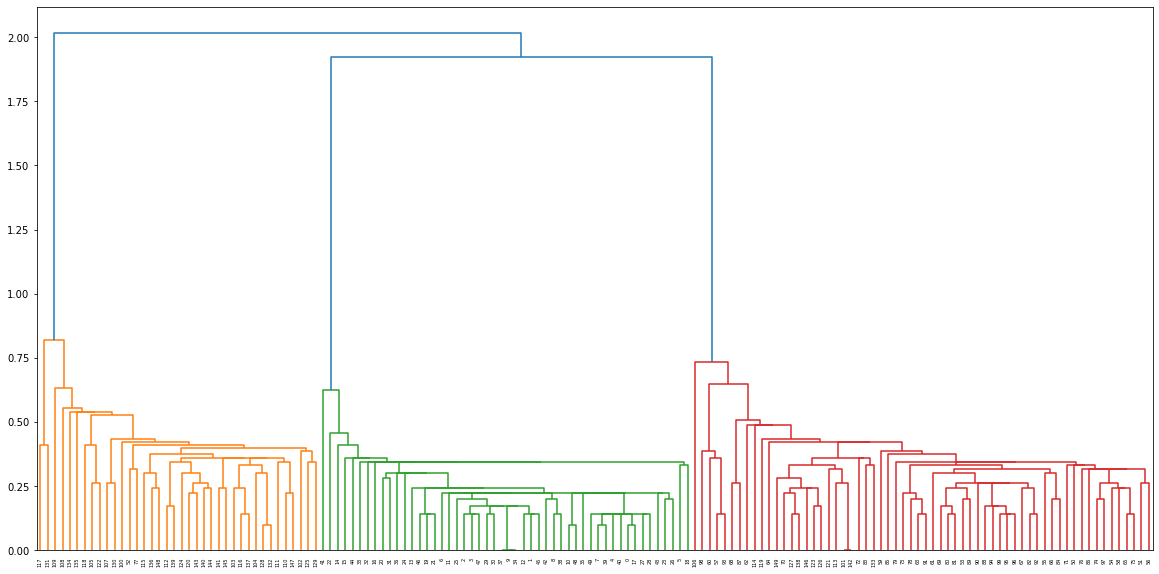

In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#complete method

plt.figure(figsize = (20,10))
mergings = linkage(data_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

# Thank You.